Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


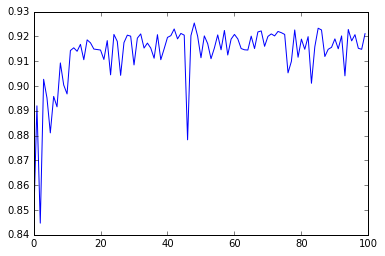

In [24]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([28*28,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
plot(plot_count, plot_acc)

Let's try gradient descent with a slower learning rate

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


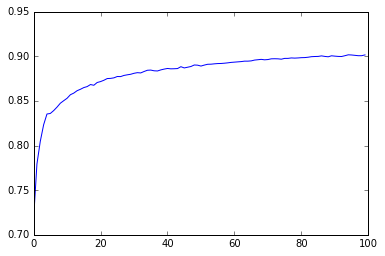

In [25]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([28*28,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
plot(plot_count, plot_acc)

For the following I've just changed the GradientDescentOptimizer to the AdamOptimizer and used the 1e-4 learning rate.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


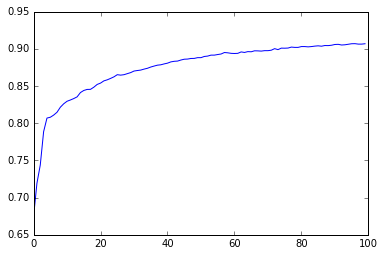

In [6]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([28*28,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
plot(plot_count, plot_acc)

For the following I've reverted back to the gradient descent but now I use one convolution matrix with 6 features.
No pooling / dropout / or internal layers beyond the original 10 from the basic net.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


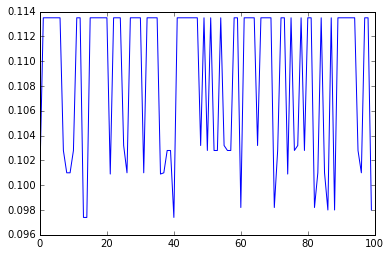

In [9]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  6 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 6
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
h_conv1 = tf.nn.relu(conv + b_conv1)
#h_conv is now [6, 28 * 28]
# ok now we need our first convolution layer reshaped
h_conv1_flat = tf.reshape(h_conv1, [-1, 28*28*FEATURES])
W = tf.Variable(tf.zeros([28*28*FEATURES,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(h_conv1_flat,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
plot(plot_count, plot_acc)    

Yikes, need to find out why that happened.  But for now, switching over to AdamOptimizer.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


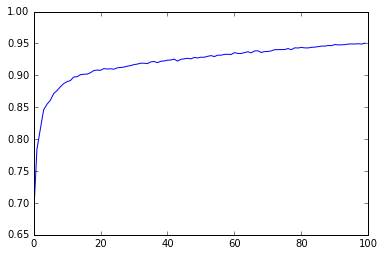

In [11]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  6 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 6
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
h_conv1 = tf.nn.relu(conv + b_conv1)
#h_conv is now [6, 28 * 28]
# ok now we need our first convolution layer reshaped
h_conv1_flat = tf.reshape(h_conv1, [-1, 28*28*FEATURES])
W = tf.Variable(tf.zeros([28*28*FEATURES,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(h_conv1_flat,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
plot(plot_count, plot_acc)    

Increased the # of features in the convolution layer to 64.  Stick with adam until I understand better why the gradient descent was failing with the convolution.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Last calculated accuracy: 0.9849


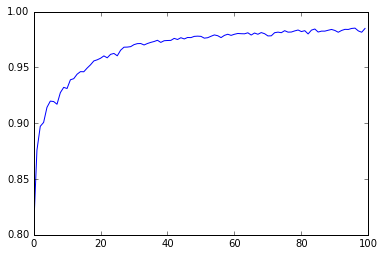

In [16]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  64 features (outputs), 5x5, 1 channel input.  64 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 64
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
h_conv1 = tf.nn.relu(conv + b_conv1)
#h_conv is now [6, 28 * 28]
# ok now we need our first convolution layer reshaped
h_conv1_flat = tf.reshape(h_conv1, [-1, 28*28*FEATURES])
W = tf.Variable(tf.zeros([28*28*FEATURES,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(h_conv1_flat,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print "Last calculated accuracy: "+str(plot_acc[-1])
plot(plot_count, plot_acc)    
show()

Adding pooling, switch back to 6 features.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Last calculated accuracy: 0.9365


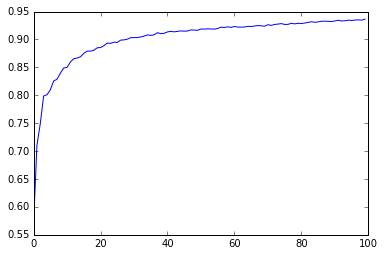

In [20]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  6 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 6
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
#ReLU activation on outputs
h_conv1 = tf.nn.relu(conv + b_conv1)
#max_pool the convolution results and reshape
pool = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
pool_flat = tf.reshape(pool, [-1, 14*14*FEATURES])
#Now we're down to 14x14 because of pooling
W = tf.Variable(tf.zeros([14*14*FEATURES,10]))
b = tf.Variable(tf.zeros([10]))
#softmax with the pool output and W
y = tf.nn.softmax(tf.matmul(pool_flat,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print "Last calculated accuracy: "+str(plot_acc[-1])
plot(plot_count, plot_acc)    
show()

Pooling with 64 features.  6 features really didn't work so well.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Last calculated accuracy: 0.9802


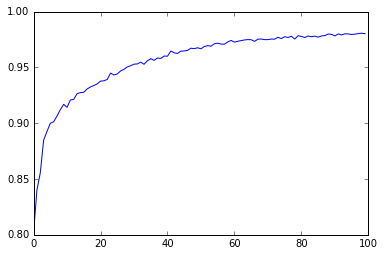

In [21]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  64 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 64
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
#ReLU activation on outputs
h_conv1 = tf.nn.relu(conv + b_conv1)
#max_pool the convolution results and reshape
pool = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
pool_flat = tf.reshape(pool, [-1, 14*14*FEATURES])
#Now we're down to 14x14 because of pooling
W = tf.Variable(tf.zeros([14*14*FEATURES,10]))
b = tf.Variable(tf.zeros([10]))
#softmax with the pool output and W
y = tf.nn.softmax(tf.matmul(pool_flat,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print "Last calculated accuracy: "+str(plot_acc[-1])
plot(plot_count, plot_acc)    
show()

Hmm, pooling didn't help much.  Add another middle layer size 1024, and let's still use 64 features.  Seems kinda important.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Last calculated accuracy: 0.9883


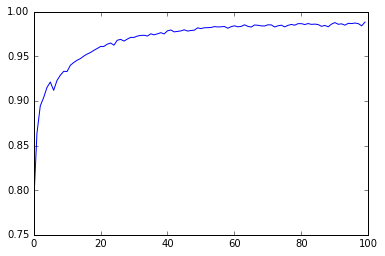

In [22]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  64 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 64
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
#ReLU activation on outputs
h_conv1 = tf.nn.relu(conv + b_conv1)
#max_pool the convolution results and reshape
pool = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
pool_flat = tf.reshape(pool, [-1, 14*14*FEATURES])

#create 1024 layer
initial = tf.truncated_normal([14*14*FEATURES, 1024], stddev=0.1)
W_1024 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[1024])
B_1024 = tf.Variable(initial)
W_1024_res = tf.nn.relu(tf.matmul(pool_flat, W_1024) + B_1024)

#Use 1024 as we're coming from the big layer
W = tf.Variable(tf.zeros([1024,10]))
b = tf.Variable(tf.zeros([10]))
#softmax with the pool output and W
y = tf.nn.softmax(tf.matmul(W_1024_res,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print "Last calculated accuracy: "+str(plot_acc[-1])
plot(plot_count, plot_acc)    
show()

Add dropout, keep everything the same.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Last calculated accuracy: 0.985


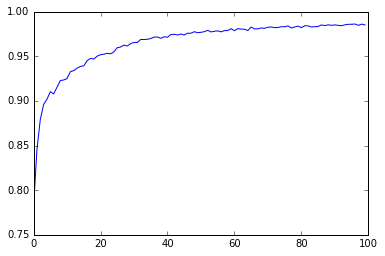

In [23]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  64 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 64
initial = tf.truncated_normal([5, 5, 1, FEATURES], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
#ReLU activation on outputs
h_conv1 = tf.nn.relu(conv + b_conv1)
#max_pool the convolution results and reshape
pool = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
pool_flat = tf.reshape(pool, [-1, 14*14*FEATURES])

#create 1024 layer
initial = tf.truncated_normal([14*14*FEATURES, 1024], stddev=0.1)
W_1024 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[1024])
B_1024 = tf.Variable(initial)
h_1024 = tf.nn.relu(tf.matmul(pool_flat, W_1024) + B_1024)

#add dropout
keep_prob = tf.placeholder("float")
h_1024_drop = tf.nn.dropout(h_1024, keep_prob)

#Use 1024 as we're coming from the big layer
W = tf.Variable(tf.zeros([1024,10]))
b = tf.Variable(tf.zeros([10]))
#softmax with the pool output and W
y = tf.nn.softmax(tf.matmul(h_1024_drop,W) + b)
y_ = tf.placeholder("float", [None,10])

#loss
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

#train
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
print "Last calculated accuracy: "+str(plot_acc[-1])
plot(plot_count, plot_acc)    
show()

Add the other feature map / pooling 

In [ ]:
%matplotlib inline
from pylab import *
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
# Convolution layer.  64 features (outputs), 5x5, 1 channel input.  6 bias
x = tf.placeholder("float", [None, 784])
FEATURES = 64
initial = tf.truncated_normal([5, 5, 1, FEATURES/2], stddev=0.1)
w_conv1 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES/2])
b_conv1 = tf.Variable(initial)
#reshape
x_image = tf.reshape(x, [-1,28,28,1])
# Convolve reshaped image vector with Kernel defined above, simple 1 strides, same padding
conv = tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME')
#ReLU activation on outputs
h_conv1 = tf.nn.relu(conv + b_conv1)
#max_pool the convolution results and reshape
pool = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


#add another convolution / max_pool
initial = tf.truncated_normal([5, 5, FEATURES/2, FEATURES], stddev=0.1)
w_conv2 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[FEATURES])
b_conv2 = tf.Variable(initial)
conv2 = tf.nn.conv2d(pool, w_conv2, strides=[1, 1, 1, 1], padding='SAME')
h_conv2 = tf.nn.relu(conv2 + b_conv2)
pool2 =  tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
pool2_flat = tf.reshape(pool2, [-1, 7*7*FEATURES])

#create 1024 layer
initial = tf.truncated_normal([7*7*FEATURES, 1024], stddev=0.1)
W_1024 = tf.Variable(initial)
initial = tf.constant(0.1, shape=[1024])
B_1024 = tf.Variable(initial)
h_1024 = tf.nn.relu(tf.matmul(pool2_flat, W_1024) + B_1024)

#add dropout
keep_prob = tf.placeholder("float")
h_1024_drop = tf.nn.dropout(h_1024, keep_prob)

#Use 1024 as we're coming from the big layer
W = tf.Variable(tf.zeros([1024,10]))
b = tf.Variable(tf.zeros([10]))
#softmax with the pool output and W
y = tf.nn.softmax(tf.matmul(h_1024_drop,W) + b)
y_ = tf.placeholder("float", [None,10])

#loss
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

#train
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
plot_acc = []
plot_count = range(100)
for j in range(100):
    for i in range(50):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    plot_acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
print "Last calculated accuracy: "+str(plot_acc[-1])
plot(plot_count, plot_acc)    
show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting